In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Datasets
customers = pd.read_csv(r"C:\Users\panch\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\panch\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\panch\Downloads\Transactions.csv")

#Data Preview
print("Customers Dataset:")
display(customers.head())
print("\nProducts Dataset:")
display(products.head())
print("\nTransactions Dataset:")
display(transactions.head())

Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [10]:
#Check Missing Values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("\nProducts:\n", products.isnull().sum())
print("\nTransactions:\n", transactions.isnull().sum())



Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [11]:
# Check duplicacy of the data
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


In [14]:
#Customer Data Analysis
print("\nCustomer Signup Dates:")
print(customers['SignupDate'].describe())

#Products Data Analysis
print("\nProduct Categories Distribution:")
print(products['Category'].value_counts())

#Transaction Data Analysis
print("\nTransaction Summary:")
print(transactions.describe())



Customer Signup Dates:
count            200
unique           179
top       2024-11-11
freq               3
Name: SignupDate, dtype: object

Product Categories Distribution:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

Transaction Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [3]:
# Merging datasets
combined = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
display(combined.head())

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


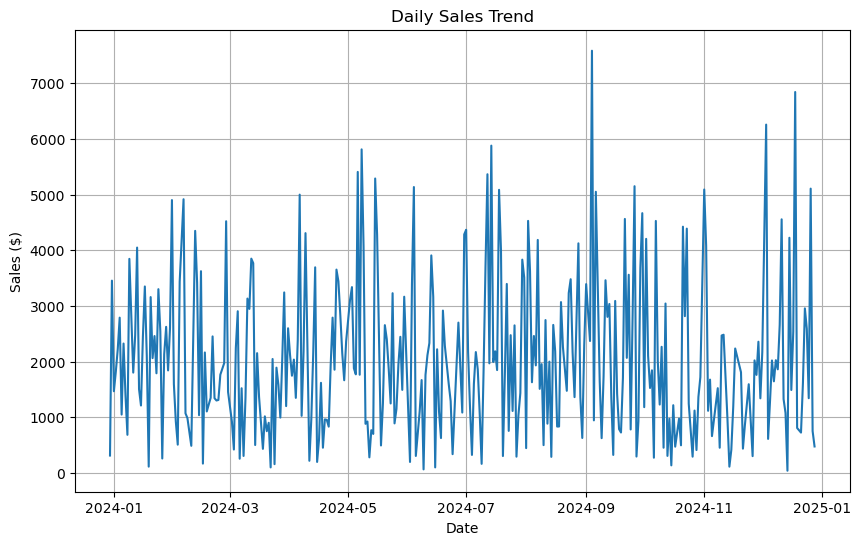

In [22]:
combined['TransactionDate'] = pd.to_datetime(combined['TransactionDate'])
combined['SignupDate'] = pd.to_datetime(combined['SignupDate'])
#display(combined.head())

# Grouping by date for sales trends
sales_trend = combined.groupby(combined['TransactionDate'].dt.date)['TotalValue'].sum()
#display(sales_trend)

# Plot sales trend
plt.figure(figsize=(10,6))
sales_trend.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()


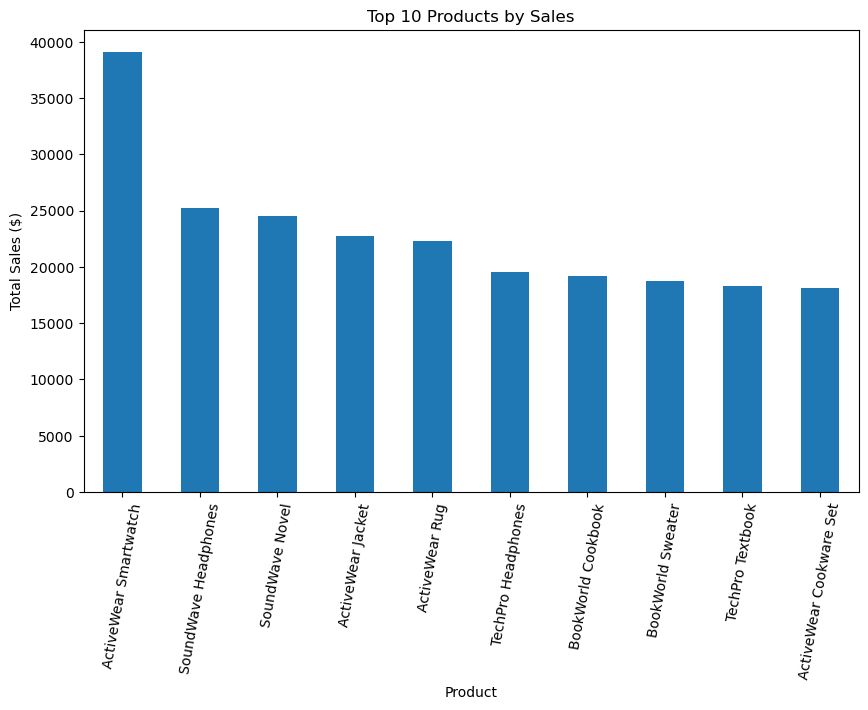

In [34]:
 #Top 10 products by sales
top_products = combined.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
#display(top_products)

# Bar plot
plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=80)
plt.show()



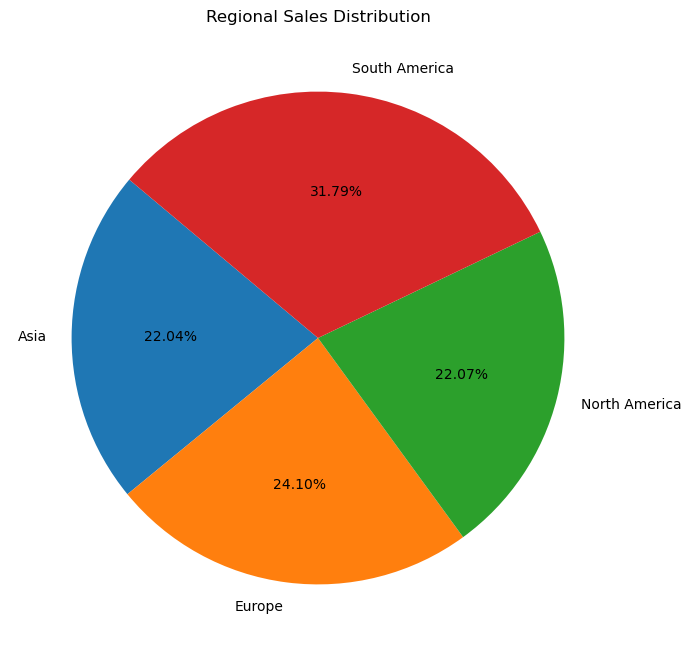

In [45]:
# Group sales by region
region_sales = combined.groupby('Region')['TotalValue'].sum()
#display(region_sales)

# Pie chart
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.2f%%', startangle=140)
plt.title('Regional Sales Distribution')
plt.ylabel('')
plt.show()

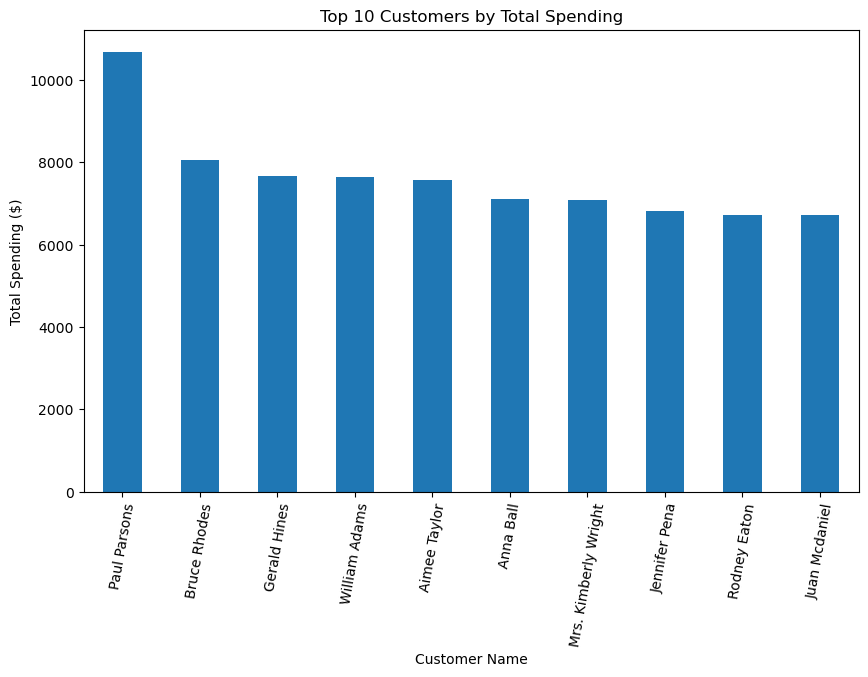

In [49]:
# Total value per customer
customer_value = combined.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
#display(customer_value)

# Plot
plt.figure(figsize=(10, 6))
customer_value.plot(kind='bar')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=80)
plt.show()

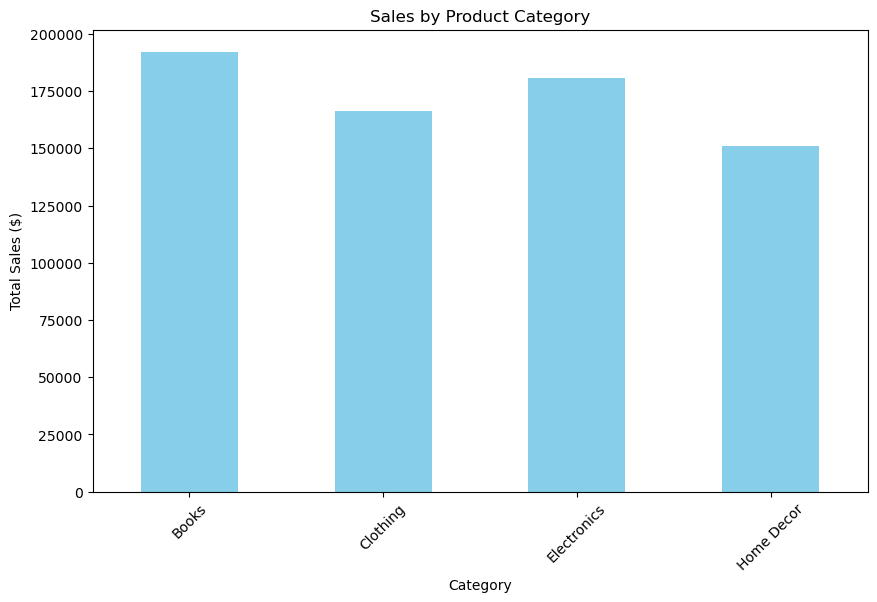

In [50]:
# Group sales by category
category_sales = combined.groupby('Category')['TotalValue'].sum()

# Bar plot
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


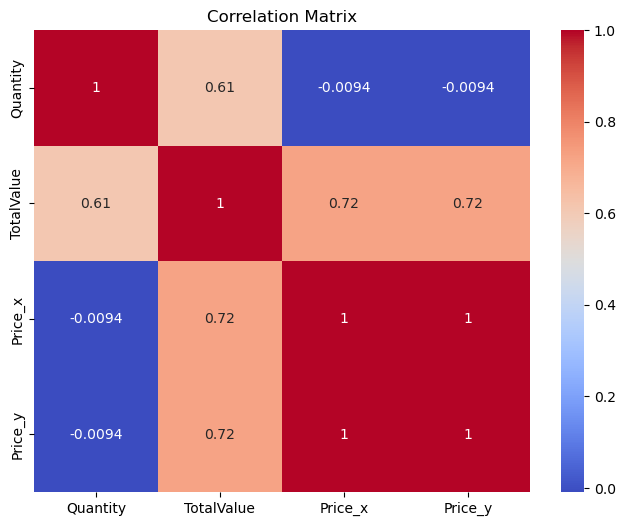

In [54]:
numeric_columns = combined.select_dtypes(include='number')  # Filters numeric columns

# Generate the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
